In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('data_processed.csv')

In [3]:
raw = raw.drop_duplicates(subset=['Latitud', 'Longitud', 'Fecha Evento'])
raw

,Región,Comuna,Tipo Remoción en masa,Factor desencadenante,Fecha Evento,Longitud,Latitud,Sistema Georeferencia,Cota (m.s.n.m)
0,Los Lagos,Castro,Flujo,Precipitaciones,07/03/2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-
1,Los Lagos,Castro,Flujo,Precipitaciones,09/03/2001,-73.7855,-42.4686,WGS 84- UTM 18 S,-
2,Los Lagos,Chaitén,Deslizamiento,Precipitaciones,03/05/2002,-72.6983,-42.4087,WGS 84- UTM 18 S,-
3,Los Lagos,Río Negro,Deslizamiento,Precipitaciones,09/08/2002,-73.7889,-40.7083,WGS 84- UTM 18 S,6
4,Los Lagos,Osorno,Deslizamiento,Precipitaciones,22/08/2007,-73.6047,-40.5750,WGS 84- UTM 18 S,126
...,...,...,...,...,...,...,...,...,...
1242,Biobío,Tomé,Deslizamiento,Precipitaciones,11/07/2006,-72.9781,-36.5932,WGS 84/ UTM 18 S,40
1243,Biobío,Talcahuano,Caída,Precipitaciones,15/06/1991,-73.1032,-36.7543,WGS 84/ UTM 18 S,-
1244,Biobío,Talcahuano,Caída,Precipitaciones,16/06/1991,-73.1032,-36.7543,WGS 84/ UTM 18 S,-
1245,Biobío,Talcahuano,Caída,Precipitaciones,17/06/1991,-73.1032,-36.7543,WGS 84/ UTM 18 S,-


In [57]:
raw_0_2 = pd.DataFrame()
raw_0_2['Longitud'] = raw['Longitud'] + 0.2
raw_0_2['Latitud'] = raw['Latitud'] + 0.2
#raw_0_2['Fecha Evento'] = raw['Fecha Evento']


In [58]:
raw_0_2['Fecha Evento'].iloc[2]

KeyError: 'Fecha Evento'

In [59]:
import script

In [60]:
path_Textural_Classes = r'Textural_Classes'
#all_paths = [path_PIRange, path_rosetta_mean, path_rosetta_sd, path_SoilMaps_mean, path_Textural_Classes]
all_paths = [path_Textural_Classes]

In [63]:
pd.read_csv('raw_data_0_2')

,Longitud,Latitud
0,-73.5855,-42.2686
1,-73.5855,-42.2686
2,-72.4983,-42.2087
3,-73.5889,-40.5083
4,-73.4047,-40.3750
...,...,...
597,-72.7781,-36.3932
598,-72.9032,-36.5543
599,-72.9032,-36.5543
600,-72.9032,-36.5543


In [62]:
raw_0_2.to_csv('raw_data_0_2', index=False)

In [22]:
"""archivos = script.archivos_extraccion(all_paths)
df = raw_0_2
new_col = script.tif_extraccion(archivos=archivos,latlon=df)
new_col"""

'archivos = script.archivos_extraccion(all_paths)\ndf = raw_0_2\nnew_col = script.tif_extraccion(archivos=archivos,latlon=df)\nnew_col'

In [67]:
from gmplot import GoogleMapPlotter

# We subclass this just to change the map type
class CustomGoogleMapPlotter(GoogleMapPlotter):
    def __init__(self, center_lat, center_lng, zoom, apikey='', map_type='satellite'):
        super().__init__(center_lat, center_lng, zoom, apikey)
        self.map_type = map_type
        assert(self.map_type in ['roadmap', 'satellite', 'hybrid', 'terrain'])

    def write_map(self, f):
        f.write('\t\tvar centerlatlng = new google.maps.LatLng(%f, %f);\n' % (self.center[0], self.center[1]))
        f.write('\t\tvar myOptions = {\n')
        f.write('\t\t\tzoom: %d,\n' % (self.zoom))
        f.write('\t\t\tcenter: centerlatlng,\n')
        f.write('\t\t\tmapTypeId: \'{}\'\n'.format(self.map_type))
        f.write('\t\t};\n')
        f.write('\t\tvar map = new google.maps.Map(document.getElementById("map_canvas"), myOptions);\n')
        f.write('\n')

# Coordenadas del punto específico -73.6047,-40.575
lat = -40.575
lon = -73.6047

# Zoom inicial
initial_zoom = 16

# Crear un mapa centrado en las coordenadas especificadas
gmap = CustomGoogleMapPlotter(lat, lon, initial_zoom, map_type='satellite')

# Añadir el punto al mapa
gmap.marker(lat, lon, 'cornflowerblue')

# Guardar el mapa en un archivo HTML
gmap.draw("mymap.html")


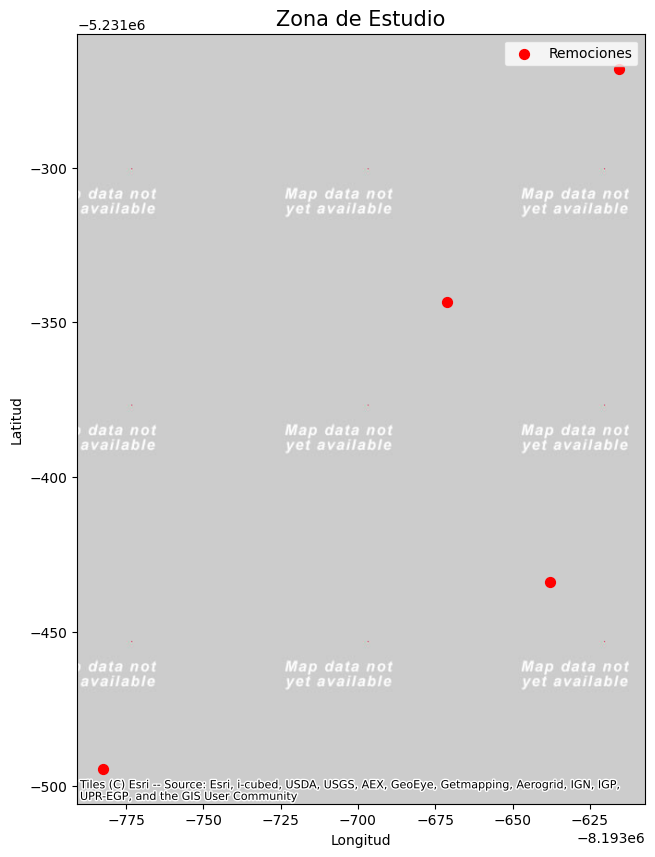

In [108]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Coordenadas del punto específico
lat = -42.4686
lon = -73.7855

coords = [
    (-42.4686, -73.6047),  # Punto original
    (-42.4680, -73.6050),  # Punto cercano 1
    (-42.4690, -73.6060),  # Punto cercano 2
    (-42.4675, -73.6045)   # Punto cercano 3
]

# Crear un GeoDataFrame con el punto
geometry = [Point(lon, lat) for lat, lon in coords]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Convertir el GeoDataFrame a la proyección Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Añadir el punto al mapa
gdf.plot(ax=ax, color='red', markersize=50)

# Añadir el fondo del mapa usando contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Personalizar el mapa
ax.set_title("Zona de Estudio", fontsize=15)
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.legend(["Remociones"], loc="upper right")

# Mostrar el mapa
plt.show()


